Carto Data 
The first part of the notebook will deal with the information from the dataset developed in Carto, related to mapping and basic chronology.

In [1]:


import pandas as pd    # for working with "rows/columns" oriented data
import urllib.request  # for loading documents using http
import numpy as np 
import sqlite3 



get_ipython().magic('matplotlib inline')



import matplotlib # plotting
import matplotlib.pyplot as plt
from pylab import *



pd.options.display.max_rows = 50

In [2]:
#load csv from github 

ramphs = pd.read_csv("https://isaw-ga-3024.github.io/miller-marlee-marleemh/OtherXMLProject/updated_ludus_cart-2.csv")

In [3]:
# confirm that all is well by displaying first two rows
ramphs.head(2)

,cartodb_id,the_geom,pleiades_id,founder_emperor,date,chronology,evidence,country_modern,city_town_ancient,id,latitude,longitude,label,control_operation
0,6,0101000020E61000009E4143FF04672840DB6D179AEB34...,https://pleiades.stoa.org/places/393480,Julius Caesar,-49,Caesarian,Textual Reference,Italy,Ravenna,Ravenna.Ludus,44.413440,12.201210,Ludus at Ravenna of G. Julius Caesar,"Imperial, but Private"
1,19,0101000020E6100000ED629AE95E1716408908FF226851...,https://pleiades.stoa.org/places/334553,Unknown,Uncertain\r\n,Second Century AD,Textual Reference,Algeria,Gemellae,Gemellae.Ludus,34.635991,5.522823,Gemellae Ludus,Imperial


In [4]:
#table with label and chronological groups,sorted by modern country 
#load intro memory and the data into SQL 
conn = sqlite3.connect(':memory:')
ramphs.to_sql ('ramphs', conn, if_exists ="replace")
pd.read_sql("""SELECT country_modern, label, chronology
    FROM ramphs ORDER BY country_modern """, conn)

,country_modern,label,chronology
0,Algeria,Gemellae Ludus,Second Century AD
1,Algeria,Lambaesis Ludus,First Century AD
2,Austria,Carnuntum Ludus,Second Century AD
3,Croatia,Salin Ludus,Second Century AD
4,Croatia,Pola Ludus,Julio-Claudian
5,Egypt,Alexandria Ludus,Julio-Claudian
6,England,Lunt Ludus,First Century AD
7,Greece,Thessalonica Ludus,Uncertain
8,Hungary,Aquincum Ludus,Second Century AD
9,Italy,Ludus at Ravenna of G. Julius Caesar,Caesarian


[]

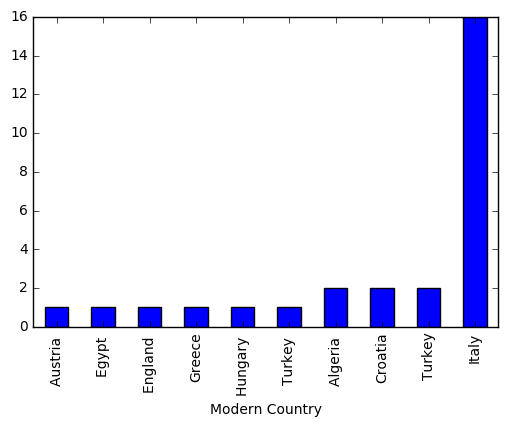

In [5]:
#table showing the number of ludi in each mondern country. Not a surprise that Italy has the most. 
country_modern = ramphs['country_modern'].dropna()
country_modern.groupby(country_modern).count().sort_values().plot.bar()
plt.xlabel('Modern Country')
plt.plot(kind='bar', stacked=True, colormap='Paired')

In [6]:
#Grouped by chronological group, this chart shows that most ludi are under Imperial control, not privately run,  
#after the Republic with the onset of the Empire, as Augustus consolidated power, which included control of public games and entertainment.
#The "Imperial, but Private" label refers to a school that was in the hands of an emperor,
#but only used for his private use, i.e. the Imperial family and entourage, not for public munera.   
chronology   = ramphs['chronology'].dropna()
conn = sqlite3.connect(':memory:')
ramphs.to_sql ('ramphs', conn, if_exists ="replace")
pd.read_sql("""SELECT  label, chronology,control_operation
    FROM ramphs ORDER BY chronology """, conn)

,label,chronology,control_operation
0,Ludus at Ravenna of G. Julius Caesar,Caesarian,"Imperial, but Private"
1,Ludus of G. Julius Caesar at Capua,Caesarian,"Imperial, but Private"
2,Lunt Ludus,First Century AD,Imperial
3,Lambaesis Ludus,First Century AD,Imperial
4,Ludus Magnus,Flavian,Imperial
5,Ludus Dacicus,Flavian,Imperial
6,Ludus Matutinus,Flavian,Imperial
7,Ludus Gallicus,Flavian,Imperial
8,Pola Ludus,Julio-Claudian,Private
9,Verona Ludus,Julio-Claudian,Private


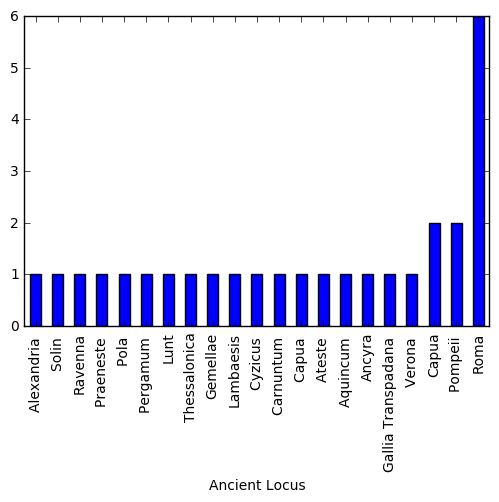

In [7]:
#bar chart counting ludus quantities by ancient city or town. This graph does not show new information, but it clearly shows 
#that Rome unspurprisingly had the most. 
city_town_ancient= ramphs['city_town_ancient'].dropna()
city_town_ancient.groupby(city_town_ancient).count().sort_values().plot.bar()
plt.xlabel('Ancient Locus')



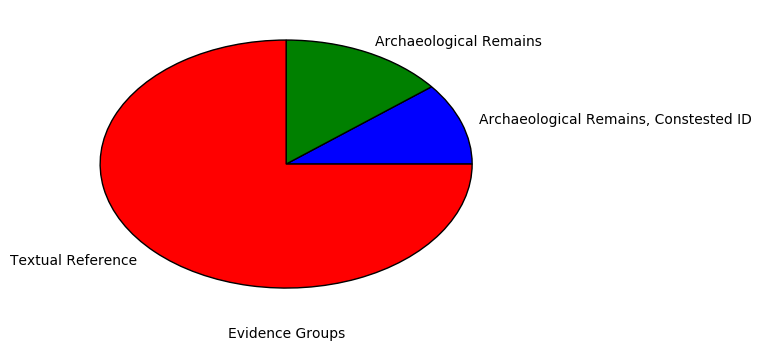

In [8]:
#I thought I would make this pie chart more detailed by separating the category of "textual Reference" into more specific 
# groups, but I decided that it would be hard to do with the existing chart. Once resolved, it should be more legible and 
#documented through manipulation of the XML files in python. 
evidence= ramphs['evidence'].dropna()


evidence.groupby(evidence).count().sort_values().plot.pie()
plt.xlabel('Evidence Groups')
plt.ylabel("")

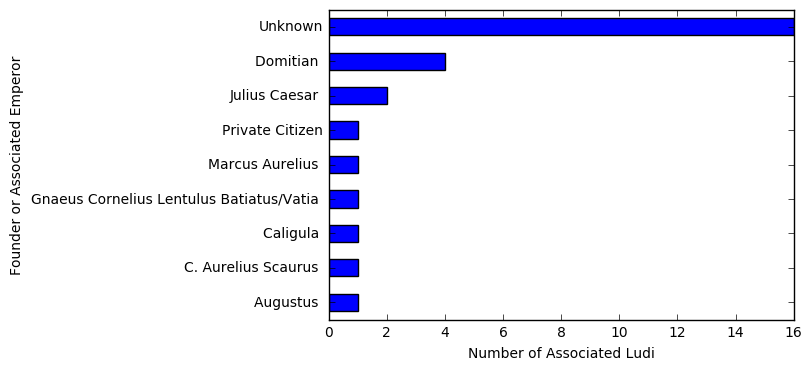

In [9]:
#horizontal bar chart showing the number of associated ludi with each founder or associated Emperor. 
#In many cases it is unknown. While I thought it would be helpful for the chart to be alphabetical, it is also 
#informative to have it in descending order in number of associated ludi. 


founder_emperor= ramphs['founder_emperor'].dropna()
founder_emperor.groupby(founder_emperor).count().sort_values().plot.barh()
plt.xlabel('Number of Associated Ludi')
plt.ylabel("Founder or Associated Emperor")

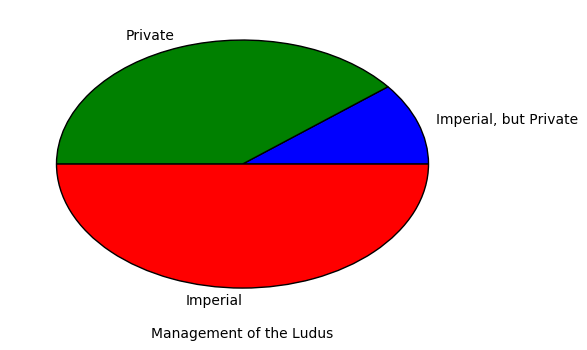

In [10]:
#Pie chart of the distribution of the control or operation of the ludi. 
control_operation= ramphs['control_operation'].dropna()
control_operation.groupby(control_operation).count().sort_values().plot.pie() 
plt.xlabel("Management of the Ludus")
plt.ylabel("")

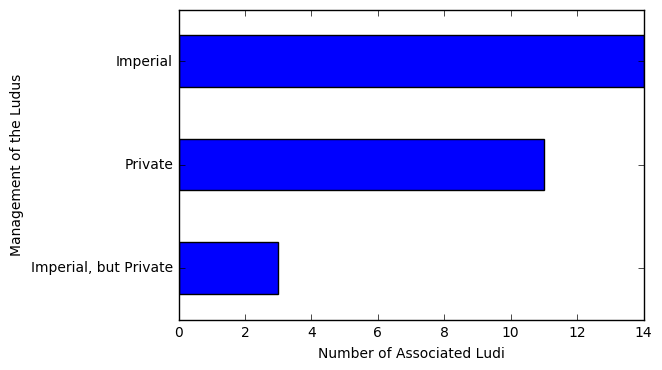

In [11]:
#A more numerical way to look at the same information. 
control_operation= ramphs['control_operation'].dropna()
control_operation.groupby(control_operation).count().sort_values().plot.barh() 
plt.xlabel('Number of Associated Ludi')
plt.ylabel("Management of the Ludus")

In [12]:
#load csv from github 

chrngrps = pd.read_csv("https://isaw-ga-3024.github.io/isaw-ga-3024.github.io/miller-marlee-marleemh/OtherXMLProject/Chrngrps")

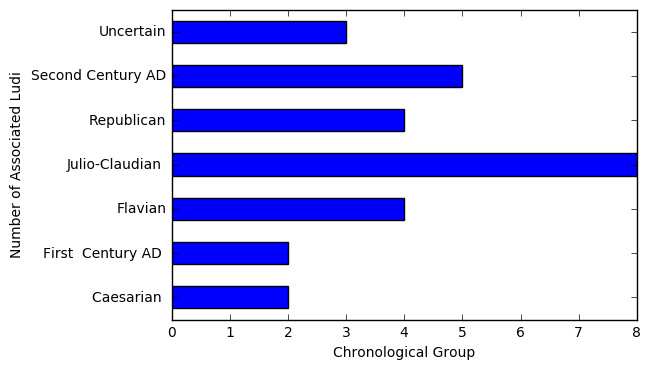

In [13]:
chronology= ramphs['chronology'].dropna()
chronology.groupby(chronology).count().plot.barh() 
plt.xlabel('Chronological Group')
plt.ylabel("Number of Associated Ludi")

In [14]:
chrngrps = pd.read_csv("https://isaw-ga-3024.github.io/isaw-ga-3024.github.io/miller-marlee-marleemh/OtherXMLProject/Chrngrps")
conn = sqlite3.connect(':memory:')
chrngrps.to_sql('chrngrps', conn, if_exists="replace")


#to show my dates for the chonological groups in the chart above. 
chrngrps

,Chrngrps,Start,End
0,Republican,-135,-31
1,Caesarian,-49,-44
2,Augustan,-27,14
3,Julio-Claudian,-27,68
4,Flavian,69,96
5,Frist Century AD,1,99
6,Second Century AD,100,199
7,Third Century AD,200,299


XML & EPIDOC 
I had intended to have python read multiple files or URLs at once, rather than uploading them individually,
but I could not make python do that. I thought that it would read the contents of the whole folder, but it did not work. If I can figure that out in the future, it would make my queries easier to read as a group with all of the texts. For example, it would be interesting to see which places are written about by historians and which are not. As of now, I have that as the "repository" element in the xml.

I am using only the ludi in Italy for this part of my notebook, because I think it is a good sample of what I have found. These are 9 of the 28 total separate schools. These include a wide range of text types and both Greek and Latin. They are grouped by school, starting in Rome. 

In [15]:
from glob import glob

In [16]:
#prints the names of the files in my ItalianLudiXML folder.
#these are the files that I have uploaded into a new folder on GitHub in my folder our repository.There are 
#also new ones that are not on my local computer

from glob import glob
for file in glob("/Users/Oldmacbook/Desktop/ItalianLudiXML/*.xml"):
    print(file) 

/Users/Oldmacbook/Desktop/ItalianLudiXML/Caligula2.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Capua.Republican.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Capua.Spartacus.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Ludus Aemilius.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Ludus Dacicus.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Ludus Gallicus.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Ludus Mat.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/ludusmag.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Ludusmag2.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Praeneste.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Praeneste2.xml
/Users/Oldmacbook/Desktop/ItalianLudiXML/Rome.Caligula.xml


In [17]:
#Ludus Magnus
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/ludusmag.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
 
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)

print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Chronography of 354 AD, Part 16: Chronicle of the City of Rome, Domitian</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <ob

In [18]:
#Ludus Magnus 

url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Ludusmag2.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>CIL VI 10169, ILS 5124</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Corpus Inscriptionum Latinarum; Inscriptiones Latinae Selectae: Inscription, Funerary </repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>


In [19]:
#Ludus Magnus 

url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/ludusmag3" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
 
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
    

print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
<teiHeader> 
        <fileDesc>
            <titleStmt>
                <title>CIL 6.9572</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Corpus Inscriptionum Latinarum: Inscription, Funerary</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
           

In [20]:
#Ludus Magnus 

url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/ludusmag4" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text)  

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>CIL VI 10164</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Corpus Inscriptionum Latinarum: Inscription, Funerary </repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
     

In [22]:
#Ludus Matutinus 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Ludus%20Mat.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        
print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text)  

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Chronography of 354 AD, Part 16: Chronicle of the City of Rome, Domitian</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <ob

In [26]:
#Ludus Gallicus 


url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Ludus%20Gallicus.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>CIL VI.9470</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Corpus Inscriptionum Latinarum</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
                            <s

In [27]:
#Ludus Gallicus 

url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/LudusGallicus2" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)

import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib) 
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Chronography of 354 AD, Part 16: Chronicle of the City of Rome, Domitian</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <ob

In [28]:
#Ludus Dacicus 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Ludus%20Dacicus.xml" 

f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)

import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text)

<?xml version="1.0" encoding="UTF-8"?>

<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Chronography of 354 AD, Part 16: Chronicle of the City of Rome, Domitian</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <o

In [29]:
#Ludus Dacicus 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Ludus%20Dacicus.xml" 

f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)

import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>

<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Chronography of 354 AD, Part 16: Chronicle of the City of Rome, Domitian</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <o

In [30]:
#Ludus Aemilius 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Ludus%20Aemilius.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>

<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title> Horace, Ars P. 32</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
                            <supportDesc>
 

In [31]:
#Caligula's Private Ludus 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Rome.Caligula.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        
print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
 


<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Pliny the Elder: Naturalis Historia, 11.54</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
                

In [41]:
#Caligula's Private Ludus 

url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Caligula2" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)

import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title> Suetonius, Caligula 38.4 </title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
                            <support

In [34]:
#Republican Ludus at Capua
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Capua.Republican.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
 

<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title> Valerius Maximus, Factorum et Dictorum memorabilium 2.3.2</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
 

In [35]:
#Ludus at Capua of Gnaeus Cornelius Lentulus Batiatus/Vatia
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Capua.Spartacus.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
        
        print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text)

<?xml version="1.0" encoding="UTF-8"?>
 
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title> Appian,Ῥωμαικά (Historia Romana), Bellum Civile 1.14</title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
       

In [36]:
#Ludus at Praeneste 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Praeneste.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>CIL XIV. 3014 </title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
<repository> Corpus Inscriptionum Latinarum: Inscription, Funerary</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
                           

In [37]:
#Ludus at Praeneste 
url_to_load = "http://isaw-ga-3024.github.io/miller-marlee-marleemh/ItalianLudiXML/Praeneste2.xml" 
f = urllib.request.urlopen(url_to_load)
tei_as_string = f.read().decode('utf-8')

print(tei_as_string)
import xml.etree.ElementTree as ET

xml_elements = ET.fromstring(tei_as_string)


print("\nList of placeName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}placeName')
for element in elements: 
    print(element.text)
    print(element.attrib)
        
print ("\nList of persName:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}persName')
for element in elements:
        print(element.text) 
        print(element.attrib)
print("\nList of repository:")
elements = xml_elements.findall('.//{http://www.tei-c.org/ns/1.0}repository')
for element in elements:
        print(element.text) 

<?xml version="1.0" encoding="UTF-8"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://relaxng.org/ns/structure/1.0"?>
<?xml-model href="http://www.stoa.org/epidoc/schema/latest/tei-epidoc.rng" schematypens="http://purl.oclc.org/dsdl/schematron"?>
<TEI xmlns="http://www.tei-c.org/ns/1.0" xml:space="preserve" xml:lang="en">
    <teiHeader>
        <fileDesc>
            <titleStmt>
                <title>Tacitus, Annales, 15.46 </title>
            </titleStmt>
            <publicationStmt>
                <authority></authority>
                <idno type="filename"></idno>
            </publicationStmt>
            <sourceDesc>
                <msDesc>
                    <msIdentifier>
                        <repository>Historian</repository>
                        <idno>inventory number</idno>
                    </msIdentifier>
                    <physDesc>
                        <objectDesc>
                            <supportDe